<a href="https://colab.research.google.com/github/fulasho/Predictive-Analytics/blob/main/Final_Project_Abdoulaye_Diallo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consumer Services Mediated Complaints**

In this project, we are going to read the CSV file [link text](https://https://data.cityofnewyork.us/Business/Consumer-Services-Mediated-Complaints/nre2-6m2s) from NYC OPEN DATA which contains consumer complaints against businesses that were mediated by the DCA Consumer Services Division during the last and current calendar years. It excludes complaints that may have ongoing legal investigations. Our dataset has 2601 records and 17 fields for our analysis.

This analysis can be used to understand the cause of these complaints, the industries that are facing it, the results and how satisfy are both the consumers and the businesses from the mediation. It also can be used by these businesses to improve their consumer services. 




We will be looking at the below questions:




1. What is the distribution of complaints by industry?
2. What is the complaint type?
3. What are the most frequently used word on the complaint?
4. What is the distribution of complaint by business name?
5. What is the distribution of complaint by business State?
6. What are the top 5 State with the largest number of complaints?
7. What is the distribution of complaint by business city?
8. What are the complaint results?
9. What is the restitution?

The classification goal is to predict the consumer satisfaction (1/0), (variable y).


Here are what the columns represent:



*   Business Name: Name of the business against which a complaint has been made

*  Industry: The business category of the business against which a complaint has been made 

*   Complaint Type: Indicates the type of complaint made.

*   Mediation Start Date: Date mediation started. During the mediation process, DCA sends a copy of complaint to the business for written response. Then, mostly over the phone, a DCA mediator speaks with both consumer and the business to reach an agreement and settle the matter
*   Mediation Close Date: Date mediation ended.

*   Complaint Result: Outcome of mediation efforts.

*   Business and Consumer Satisfaction: This section indicates whether the complaint was mediated to the satisfaction of both the business and consumer.


*   Restitution: Total amount of consumer restitution secured through mediation.
*   Business Building: The building number of the business’s address.


*   Business Street: The street name of the business’s address.

*   Business Address Unit: The unit number of the business’s address (e.g., Apartment/Suite/Other)

*   Business City: The city where the business is located.  

*   Business State: The state where the business is located. 
*   Business ZIP : The zip code where the business is located.

*   Complainant ZIP: The zip code where the individual who filed the complaint is located.

# **Importing Libraries**


In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading the Dataset**

In [270]:
NYC_Consumer_Services = pd.read_csv('/content/drive/MyDrive/Data1/Consumer_Services_Mediated_Complaints.csv')
NYC_Consumer_Services = NYC_Consumer_Services.dropna()

# **Exploratory Data Analysis**

In [271]:
NYC_Consumer_Services.head()

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip,Longitude,Latitude
12,DELGADO TRAVEL,Travel Agency - 440,Exchange Goods/Contract Cancelled - E01,03/18/2022,04/08/2022,Cash Amount - AMT,Yes,200.0,546,E 138TH ST,PH,BRONX,NY,10454.0,11207,-73.917323,40.806732
72,WEST 81ST GARAGE LLC,Garage - 049,Damaged Goods - D01,07/30/2021,08/25/2021,Advised to Sue - ATS,No,0.0,280,PARK AVE S,2L,NEW YORK,NY,10010.0,10024,-73.980457,40.785296
82,"DIPLOMAT HOME IMPROVEMENT, LLC",Home Improvement Contractor - 100,Quality of Work - Q01,07/02/2021,07/29/2021,Advised to Sue - ATS,No,0.0,22110,JAMAICA AVE,109,QUEENS VILLAGE,NY,11428.0,10472,-73.732960,40.719740
87,DIMOV TAX SPECIALISTS,Tax Preparers - 891,Misrepresentation - M01,04/22/2022,04/29/2022,Consumer Took Action - CTA,No,0.0,211,E 43RD ST,628,NEW YORK,NY,10017.0,11206,-73.988022,40.722736
88,EVENTBRITE,Tickets-Live Perf - 260,Exchange Goods/Contract Cancelled - E01,11/05/2021,11/30/2021,Advised to Sue - ATS,No,0.0,155,5TH ST,7TH FL,SAN FRANCISCO,CA,94103.0,11230,-73.990758,40.719333


In [272]:
NYC_Consumer_Services.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 12 to 2586
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Business Name          151 non-null    object 
 1   Industry               151 non-null    object 
 2   Complaint Type         151 non-null    object 
 3   Mediation Start Date   151 non-null    object 
 4   Mediation Close Date   151 non-null    object 
 5   Complaint Result       151 non-null    object 
 6   Satisfaction           151 non-null    object 
 7   Restitution            151 non-null    float64
 8   Business Building      151 non-null    object 
 9   Business Street        151 non-null    object 
 10  Building Address Unit  151 non-null    object 
 11  Business City          151 non-null    object 
 12  Business State         151 non-null    object 
 13  Business Zip           151 non-null    float64
 14  Complainant Zip        151 non-null    object 
 15  Long

In [273]:
NYC_Consumer_Services.duplicated()

12      False
72      False
82      False
87      False
88      False
        ...  
2535    False
2560    False
2565    False
2579    False
2586    False
Length: 151, dtype: bool

In [274]:
NYC_Consumer_Services.isnull().sum()

Business Name            0
Industry                 0
Complaint Type           0
Mediation Start Date     0
Mediation Close Date     0
Complaint Result         0
Satisfaction             0
Restitution              0
Business Building        0
Business Street          0
Building Address Unit    0
Business City            0
Business State           0
Business Zip             0
Complainant Zip          0
Longitude                0
Latitude                 0
dtype: int64

*Let Drop some columns that not necessary to the analysis*

In [275]:
NYC_Consumer_Services.drop(['Business Building', 'Business Street','Building Address Unit','Business Zip','Complainant Zip ','Longitude','Latitude' ], axis = 1, inplace = True)

# **Response Variable(Satisfaction)**

In [276]:
NYC_Consumer_Services['Satisfaction'].value_counts(dropna=False)

No     79
Yes    72
Name: Satisfaction, dtype: int64

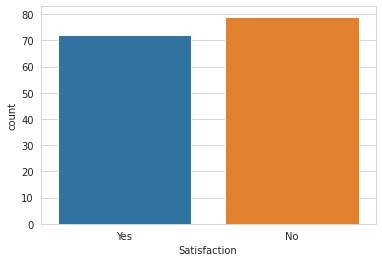

In [277]:
sns.countplot(x='Satisfaction', data=NYC_Consumer_Services)
sns.set_style('whitegrid')

In [278]:
NYC_Consumer_Services['Satisfaction'] = np.where(NYC_Consumer_Services['Satisfaction'] == "Yes" , 1 , 0)

In [279]:
NYC_Consumer_Services['Satisfaction'].value_counts()

0    79
1    72
Name: Satisfaction, dtype: int64

In [280]:
NYC_Consumer_Services['Satisfaction'].value_counts(normalize=True, dropna=False)

0    0.523179
1    0.476821
Name: Satisfaction, dtype: float64

*52*% of Customers/Businesses have not satisfaction and 47% have. This is a balance *classification problem*

# **Exploratory Analysis**

In [281]:
NYC_Consumer_Services['Mediation Start Date'].nunique()

61

In [282]:
NYC_Consumer_Services['Mediation Close Date'].nunique()

124

**Let convert the date type to datetime so that we can extract the mediation start year and month**

In [283]:
NYC_Consumer_Services['Mediation Start Date'] = pd.to_datetime(NYC_Consumer_Services['Mediation Start Date'])

In [284]:
NYC_Consumer_Services['Mediation Start Date'].unique()

array(['2022-03-18T00:00:00.000000000', '2021-07-30T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2022-04-22T00:00:00.000000000',
       '2021-11-05T00:00:00.000000000', '2021-12-17T00:00:00.000000000',
       '2021-07-23T00:00:00.000000000', '2021-08-20T00:00:00.000000000',
       '2020-11-13T00:00:00.000000000', '2022-02-11T00:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2021-02-12T00:00:00.000000000',
       '2021-04-30T00:00:00.000000000', '2021-12-03T00:00:00.000000000',
       '2021-03-26T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2021-11-19T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-12-10T00:00:00.000000000', '2022-04-15T00:00:00.000000000',
       '2021-09-10T00:00:00.000000000', '2022-03-11T00:00:00.000000000',
       '2021-09-17T00:00:00.000000000', '2021-11-12T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-09-03T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-06-25

In [285]:
NYC_Consumer_Services['Mediation Start Date'].dt.year

12      2022
72      2021
82      2021
87      2022
88      2021
        ... 
2535    2021
2560    2021
2565    2021
2579    2021
2586    2021
Name: Mediation Start Date, Length: 151, dtype: int64

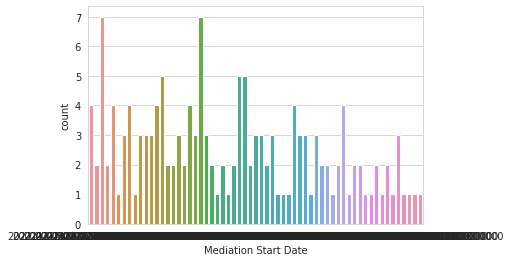

In [286]:
sns.countplot(x='Mediation Start Date', data =  NYC_Consumer_Services)

In [287]:
NYC_Consumer_Services['Mediation Start Date'].dt.month

12       3
72       7
82       7
87       4
88      11
        ..
2535    11
2560     6
2565    12
2579     7
2586     6
Name: Mediation Start Date, Length: 151, dtype: int64

**Distribution of Complaints by Industry** 

In [288]:
NYC_Consumer_Services['Industry'].nunique()

25

In [289]:
NYC_Consumer_Services['Industry'].value_counts()

Garage - 049                                        46
Home Improvement Contractor - 100                   43
Travel Agency - 440                                 12
Electronic Store - 001                               6
Employment Agency - 034                              5
Tax Preparers - 891                                  4
Furniture Sales - 242                                4
Misc Non-Food Retail - 817                           4
Locksmith - 062                                      3
Other                                                3
Tow Truck Company - 124                              2
Retail Store - 820                                   2
Dry Cleaners - 230                                   2
Electronic & Home Appliance Service Dealer - 115     2
Restaurant - 818                                     2
Debt Collection Agency - 122                         2
Jewelry Store-Retail - 823                           1
Appliances - 244                                     1
Mailorder 

Text(0, 0.5, 'Count')

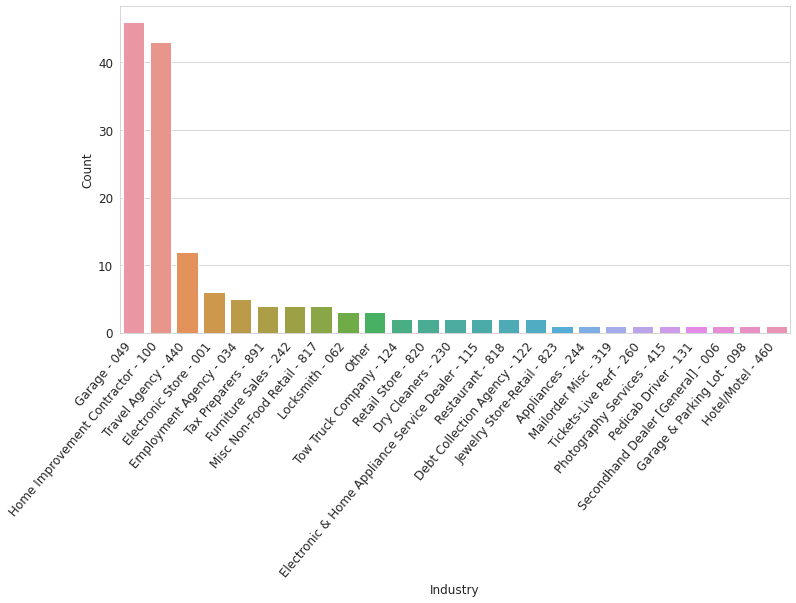

In [290]:
# Distribution of Complaints by Industry

plt.figure(figsize = (12,6))
plt.xticks(rotation=50, fontsize=12, ha="right")
plt.yticks(fontsize=12)
g = sns.countplot(x='Industry', data = NYC_Consumer_Services,  order = NYC_Consumer_Services['Industry'].value_counts().index)
g.set_xlabel('Industry', fontsize=12)
g.set_ylabel("Count", fontsize=12)

**Distribution of Complaint Type**

In [291]:
NYC_Consumer_Services['Complaint Type'].nunique()

19

In [292]:
NYC_Consumer_Services['Complaint Type'].value_counts().head()

Surcharge/Overcharge - S02                 25
Damaged Goods - D01                        24
Exchange Goods/Contract Cancelled - E01    23
Quality of Work - Q01                      20
Non-Delivery of Service - N02              12
Name: Complaint Type, dtype: int64

Text(0, 0.5, 'Count')

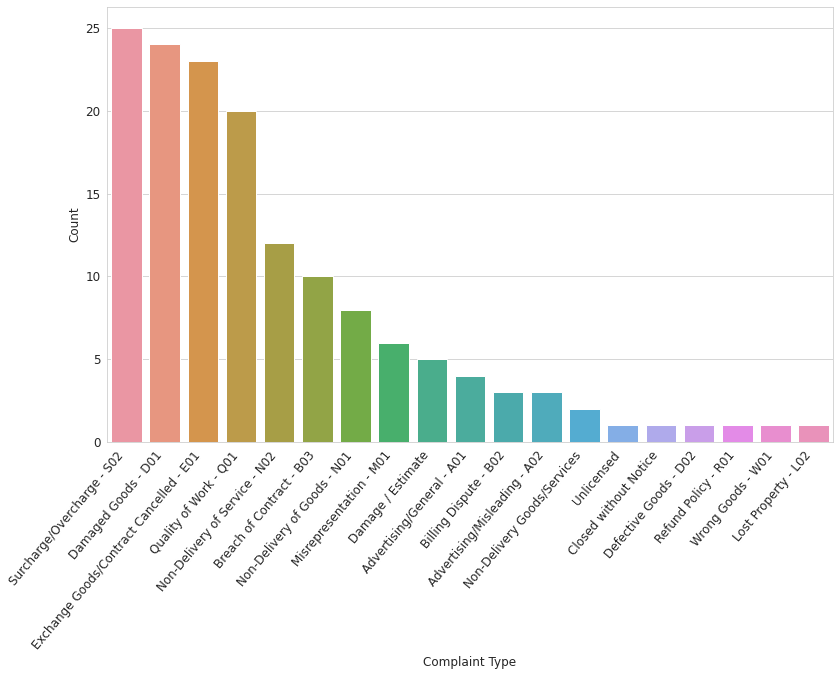

In [293]:
# Distribution of Complaint Type

plt.figure(figsize = (13,8))
plt.xticks(rotation=50, fontsize=12, ha="right")
plt.yticks(fontsize=12)
g = sns.countplot(x='Complaint Type', data = NYC_Consumer_Services,  order = NYC_Consumer_Services['Complaint Type'].value_counts().index)
g.set_xlabel('Complaint Type', fontsize=12)
g.set_ylabel("Count", fontsize=12)

**Let clean the Complaint Type column**

In [294]:
NYC_Consumer_Services["Complaint Type"].unique()

array(['Exchange Goods/Contract Cancelled - E01', 'Damaged Goods - D01',
       'Quality of Work - Q01', 'Misrepresentation - M01',
       'Surcharge/Overcharge - S02', 'Non-Delivery of Service - N02',
       'Damage / Estimate', 'Billing Dispute - B02',
       'Breach of Contract - B03', 'Advertising/General - A01',
       'Non-Delivery of Goods - N01', 'Unlicensed',
       'Closed without Notice', 'Defective Goods - D02',
       'Advertising/Misleading - A02', 'Non-Delivery Goods/Services',
       'Refund Policy - R01', 'Wrong Goods - W01', 'Lost Property - L02'],
      dtype=object)

In [295]:
NYC_Consumer_Services = NYC_Consumer_Services.replace(['Exchange Goods/Contract Cancelled - E01', 'Damaged Goods - D01',
       'Quality of Work - Q01', 'Misrepresentation - M01',
       'Surcharge/Overcharge - S02', 'Non-Delivery of Service - N02',
       'Damage / Estimate', 'Billing Dispute - B02',
       'Breach of Contract - B03', 'Advertising/General - A01',
       'Non-Delivery of Goods - N01', 'Unlicensed',
       'Closed without Notice', 'Defective Goods - D02',
       'Advertising/Misleading - A02', 'Non-Delivery Goods/Services',
       'Refund Policy - R01', 'Wrong Goods - W01', 'Lost Property - L02'])

/usr/local/lib/python3.7/dist-packages/pandas/core/missing.py:94: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


**Most frequently used words using word cloud**

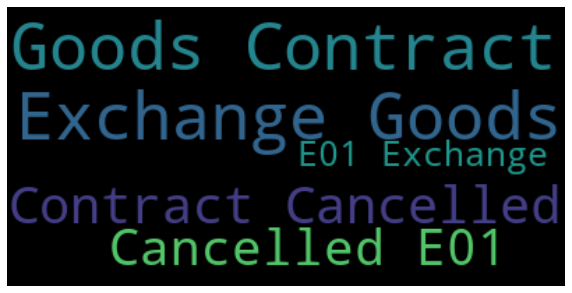

In [296]:
# Most frequently used words using word cloud

from wordcloud import WordCloud

all_articles = ' '.join(NYC_Consumer_Services['Complaint Type'])
wordcloud_spam = WordCloud().generate(all_articles)
plt.figure(figsize = (10,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

**Distribution of Complaint by Business name**

In [297]:
NYC_Consumer_Services['Business Name'].nunique()

139

In [298]:
NYC_Consumer_Services['Business Name'].value_counts()

DIPLOMAT HOME IMPROVEMENT, LLC           5
BEST BUY STORES, LP#835                  3
NEW DYNAMIC BUILDERS, CORP.              2
WEST 30TH GARAGE LLC                     2
SP PLUS CORPORATION                      2
                                        ..
QUIK PARK WEST 23RD STREET GARAGE LLC    1
MERIT PARKING LLC                        1
PARK SOHO LLC                            1
UPTOWN PARKING CORP.                     1
THE HOME DEPOT AT-HOME SERVICES INC      1
Name: Business Name, Length: 139, dtype: int64

**Distribution of Complaint Business State**

In [299]:
NYC_Consumer_Services['Business State'].nunique()

10

In [300]:
NYC_Consumer_Services['Business State'].value_counts().head()

NY    136
IL      4
NJ      3
CT      2
CA      1
Name: Business State, dtype: int64

In [301]:
NYC_Consumer_Services['Business State'].value_counts(normalize=True, dropna=False).head()

NY    0.900662
IL    0.026490
NJ    0.019868
CT    0.013245
CA    0.006623
Name: Business State, dtype: float64

**Top 5 states with largest number of complaints.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

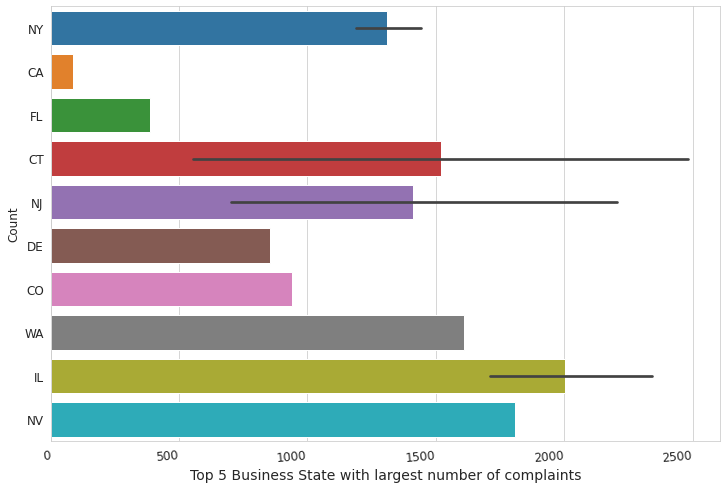

In [302]:
# Top 5 states with largest number of complaints.
plt.figure(figsize = (12,8))
plt.xticks(rotation=5, fontsize=12, ha="right")
plt.yticks(fontsize=12)
g = sns.barplot(NYC_Consumer_Services['Business State'].index[0:], NYC_Consumer_Services['Business State'].values[0:])
g.set_xlabel("Top 5 Business State with largest number of complaints", fontsize=14)
g.set_ylabel("Count", fontsize=12)

**Distribution of Complaint Business City**

In [303]:
NYC_Consumer_Services['Business City'].nunique()

36

In [304]:
NYC_Consumer_Services['Business City'].value_counts().head()

NEW YORK          69
BROOKLYN          26
FLUSHING           9
QUEENS VILLAGE     5
BRONX              3
Name: Business City, dtype: int64

In [305]:
NYC_Consumer_Services['Business City'].value_counts(normalize=True, dropna=False).head()

NEW YORK          0.456954
BROOKLYN          0.172185
FLUSHING          0.059603
QUEENS VILLAGE    0.033113
BRONX             0.019868
Name: Business City, dtype: float64

**Distribution of Complaints result**

In [306]:
NYC_Consumer_Services['Complaint Result'].nunique()

11

In [307]:
NYC_Consumer_Services['Complaint Result'].value_counts()

Advised to Sue - ATS                                  55
Resolved and Consumer Satisfied - SPF                 40
Cash Amount - AMT                                     20
No Satisfactory Agreement - NSA                       12
No Business Response - NVR                             8
Consumer Took Action - CTA                             4
Goods Repaired - GRS                                   4
Store Credit - SCR                                     4
Credit Card Refund and/or Contract Cancelled - CRC     2
Bill Reduced - BLR                                     1
Goods Exchanged - GEX                                  1
Name: Complaint Result, dtype: int64

In [308]:
NYC_Consumer_Services['Complaint Result'].value_counts(normalize=True, dropna=False).head()

Advised to Sue - ATS                     0.364238
Resolved and Consumer Satisfied - SPF    0.264901
Cash Amount - AMT                        0.132450
No Satisfactory Agreement - NSA          0.079470
No Business Response - NVR               0.052980
Name: Complaint Result, dtype: float64

Text(0, 0.5, 'Count')

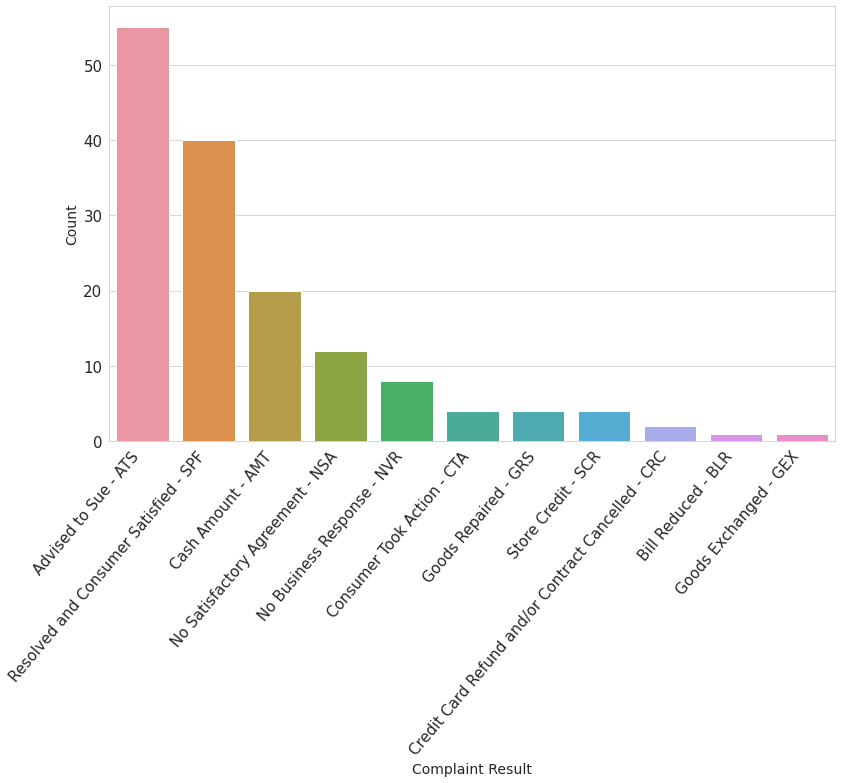

In [309]:
# Distribution of Complaints result

plt.figure(figsize = (13,8))
plt.xticks(rotation=50, fontsize=15, ha="right")
plt.yticks(fontsize=15)
g = sns.countplot(x='Complaint Result', data = NYC_Consumer_Services,  order = NYC_Consumer_Services['Complaint Result'].value_counts().index)
g.set_xlabel('Complaint Result', fontsize=14)
g.set_ylabel("Count", fontsize=14)

**Restitution** (*Total amount of consumer restitution secured through mediation.)*

In [310]:
NYC_Consumer_Services['Restitution'].nunique()

25

In [311]:
NYC_Consumer_Services['Restitution'].value_counts()

0.0       125
200.0       2
1000.0      2
1836.0      1
4058.0      1
50.0        1
426.0       1
375.0       1
5000.0      1
109.0       1
299.0       1
60.0        1
136.0       1
120.0       1
12.0        1
821.0       1
33.0        1
364.0       1
53.0        1
515.0       1
166.0       1
656.0       1
40.0        1
300.0       1
1830.0      1
Name: Restitution, dtype: int64

*Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to directly take in those features as inputs*

In [312]:
Complaint_Type= pd.get_dummies(NYC_Consumer_Services['Complaint Type'], drop_first=True)

In [313]:
NYC_Consumer_Services.drop(['Business Name','Complaint Type','Mediation Start Date','Mediation Close Date','Industry','Complaint Result','Business City','Business State'], axis=1, inplace=True)

In [314]:
NYC_Consumer_Services.head()

,Satisfaction,Restitution
12,1,200.0
72,0,0.0
82,0,0.0
87,0,0.0
88,0,0.0


# **Training a Logistic Regression Model**

In [315]:
from sklearn.model_selection import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(NYC_Consumer_Services.drop('Satisfaction',axis=1), NYC_Consumer_Services['Satisfaction'], test_size=0.30, random_state=42)

In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [319]:
predictions = logmodel.predict(X_test)

In [320]:
from sklearn.metrics import classification_report

In [321]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        26
           1       1.00      0.25      0.40        20

    accuracy                           0.67        46
   macro avg       0.82      0.62      0.59        46
weighted avg       0.79      0.67      0.61        46



In [322]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Satisfaction", sum(pp!=0))
print("Not Satisfy", sum(pp==0))

0.6739130434782609
Satisfaction 5
Not Satisfy 41


# **Training a Decision Tree Model**

In [323]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
dtree = DecisionTreeClassifier()

In [325]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

# **Predictions and Evaluation of Decision Tree**

In [326]:
y_predict = dtree.predict(X_test)

In [327]:
from sklearn.metrics import confusion_matrix, classification_report

In [328]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        26
           1       1.00      0.25      0.40        20

    accuracy                           0.67        46
   macro avg       0.82      0.62      0.59        46
weighted avg       0.79      0.67      0.61        46



# **Training the Random Forest model**

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rforest = RandomForestClassifier(n_estimators = 300)

In [331]:
rforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [332]:
y_predict = rforest.predict(X_test)

In [333]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        26
           1       1.00      0.25      0.40        20

    accuracy                           0.67        46
   macro avg       0.82      0.62      0.59        46
weighted avg       0.79      0.67      0.61        46



In [334]:
print(confusion_matrix(y_test,y_predict))

[[26  0]
 [15  5]]


Conclusion, We tried to answer all above question and make prediction about how much consumers and businesses are satisfy with the mediation. 

We found that:


25 industries with 139 business names in 10 separate State and 36 different business cities received 19 types of complaints. New York State accounted the highest 136 of these complaints 90% followed by the State of Illinois 4%. In my opinion, it because New York State and Illinois are among the most populous state and many businesses are operating in.

We have 11 different type of complaint results. Advised to sue and, resolved and consumer satisfied accounted for 36% and 26% respectively.  

There are 25 restitutions that are secured through mediation.

In this analysis, we used three different Machine Learning Model(Logistic regression, decision tree and random forest Model) to predict for both consumers and businesses satisfaction and all of them provided 67% accuracy
